In [3]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
#Membaca Dataset

df1 = pd.read_csv('diabetes_latih.csv')
df2 = pd.read_csv('diabetes_uji.csv')

In [5]:
#Proses Data_latih 

dfnew1 = df1.drop(df1.columns[[]], axis=1)
new1 = dfnew1.head()
a1 = dfnew1.shape
print(new1)
print("Total", a1)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur  Hasil
0          8      188     78           0        0  47.9    0.137    43      1
1          7      152     88          44        0  50.0    0.337    36      1
2          2       99     52          15       94  24.6    0.637    21      0
3          1      109     56          21      135  25.2    0.833    23      0
4          2       88     74          19       53  29.0    0.229    22      0
Total (614, 9)


In [8]:
#Proses Data_Uji

dfnew2 = df2.drop(df2.columns[[]], axis=1)
new2 = dfnew2.head()
a2 = dfnew2.shape
print(new2)
print("Total", a2)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur  Hasil
0          6      148     72          35        0  33.6    0.627    50      1
1          1       85     66          29        0  26.6    0.351    31      0
2          8      183     64           0        0  23.3    0.672    32      1
3          1       89     66          23       94  28.1    0.167    21      0
4          0      137     40          35      168  43.1    2.288    33      1
Total (154, 9)


In [9]:
#Pemisahan Variabel Hasil Data_Training

x_train = dfnew1.drop(columns=['Hasil'])
a4 = x_train.head()
print(a4)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur
0          8      188     78           0        0  47.9    0.137    43
1          7      152     88          44        0  50.0    0.337    36
2          2       99     52          15       94  24.6    0.637    21
3          1      109     56          21      135  25.2    0.833    23
4          2       88     74          19       53  29.0    0.229    22


In [10]:
#Pemisahan Variabel Hasil Data_Uji

y_train = dfnew2.drop(columns=['Hasil'])
a4 = y_train.head()
print(a4)

   Kehamilan  Glukosa  Darah  LemakTubuh  Insulin   BMI  Riwayat  Umur
0          6      148     72          35        0  33.6    0.627    50
1          1       85     66          29        0  26.6    0.351    31
2          8      183     64           0        0  23.3    0.672    32
3          1       89     66          23       94  28.1    0.167    21
4          0      137     40          35      168  43.1    2.288    33


In [12]:
#Hasil Dari Data_Training dipisah dan Dibuatkan List sendiri

x_test = dfnew1['Hasil'].values
x_test[0:8]

array([1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [13]:
#Hasil Dari Data_Uji dipisah dan Dibuatkan List sendiri

y_test = dfnew2['Hasil'].values
y_test[0:8]

array([1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

C:\Users\ACER\AppData\Local\Temp/ipykernel_82864/4061631512.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfnew1.corr(), dtype = np.bool)


<AxesSubplot:title={'center':'Korelasi antar Fitur'}>

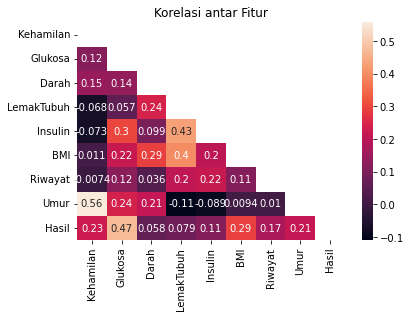

In [14]:
#Heatmap Data_training

mask = np.zeros_like(dfnew1.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Korelasi antar Fitur')
sns.heatmap(dfnew1.corr(),
           annot = True,
           mask = mask)

C:\Users\ACER\AppData\Local\Temp/ipykernel_82864/3442221444.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfnew2.corr(), dtype = np.bool)


<AxesSubplot:title={'center':'Korelasi antar Fitur'}>

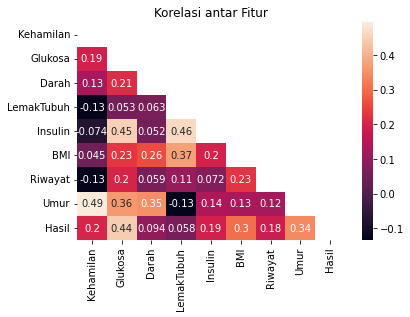

In [15]:
#Heatmap Data_Uji

mask = np.zeros_like(dfnew2.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Korelasi antar Fitur')
sns.heatmap(dfnew2.corr(),
           annot = True,
           mask = mask)

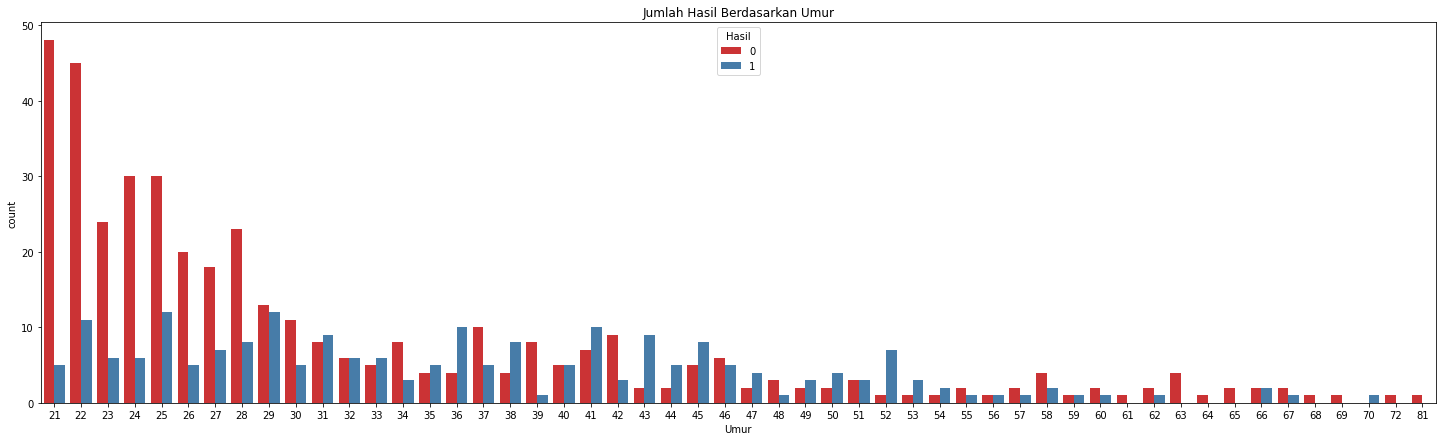

In [16]:
#Menampilkan Grafik Data_Training

plt.figure(figsize=(25,7))
hasil2 = sns.countplot(x='Umur', hue='Hasil', data=dfnew1, palette='Set1')
plt.title('Jumlah Hasil Berdasarkan Umur')
plt.show(hasil2)

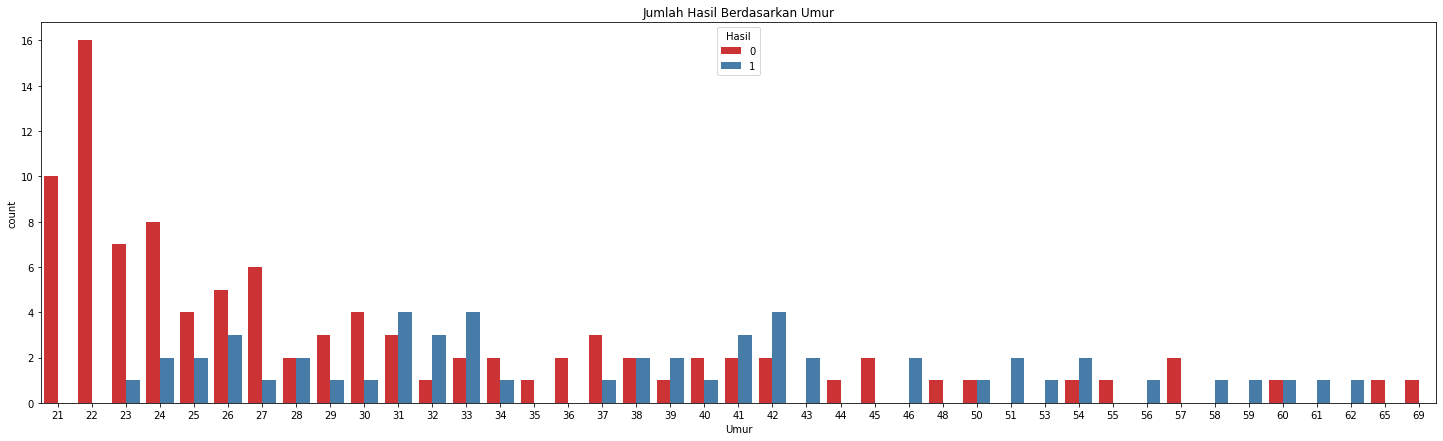

In [17]:
#Menampilkan Grafik Data_Uji

plt.figure(figsize=(25,7))
hasil2 = sns.countplot(x='Umur', hue='Hasil', data=dfnew2, palette='Set1')
plt.title('Jumlah Hasil Berdasarkan Umur')
plt.show(hasil2)

In [19]:
print("Jumlah Data Latih:", len(x_train))
print("Jumlah Data Uji:", len(x_test))

Jumlah Data Latih: 614
Jumlah Data Uji: 614


In [23]:
#Membuat KNN

neighbors = 4
knn = KNeighborsClassifier(neighbors)
best_model = knn.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 154]

In [54]:
#Menampilkan Prediksi

arr = knn.predict(x_test)[0:8]
#print(arr)

score = []
score = knn.score(x_test, y_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

In [55]:
print("Jumlah K : ", neighbors)
print("Akruasi : ", score * 100, "%")

Jumlah K :  3


NameError: name 'score' is not defined

In [182]:
#Normalisasi Data

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [183]:
#Meload model - KNN

classifier = KNeighborsClassifier(n_neighbors=4, p=2, metric = 'euclidean')

In [184]:
#fitting Model

classifier.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 123]

In [185]:
#Membuat Prediksi

y_pred = classifier.predict(x_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [186]:
#Evaluasi Model

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f1_score(y_test, y_pred) * 100, '%')

ValueError: Found input variables with inconsistent numbers of samples: [31, 154]

In [187]:
#Hasil Akurasi

print(accuracy_score(y_test, y_pred) * 100, '%')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [31, 154]

In [188]:
error = []
epen = []

#Hasil Kalkulasi Eror untuk nilai K dari 1 sampai 30

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    emen = np.mean(pred_i != y_test)
    epen = error.append(emen)
    
    print (i, emen)

ValueError: Found input variables with inconsistent numbers of samples: [614, 123]

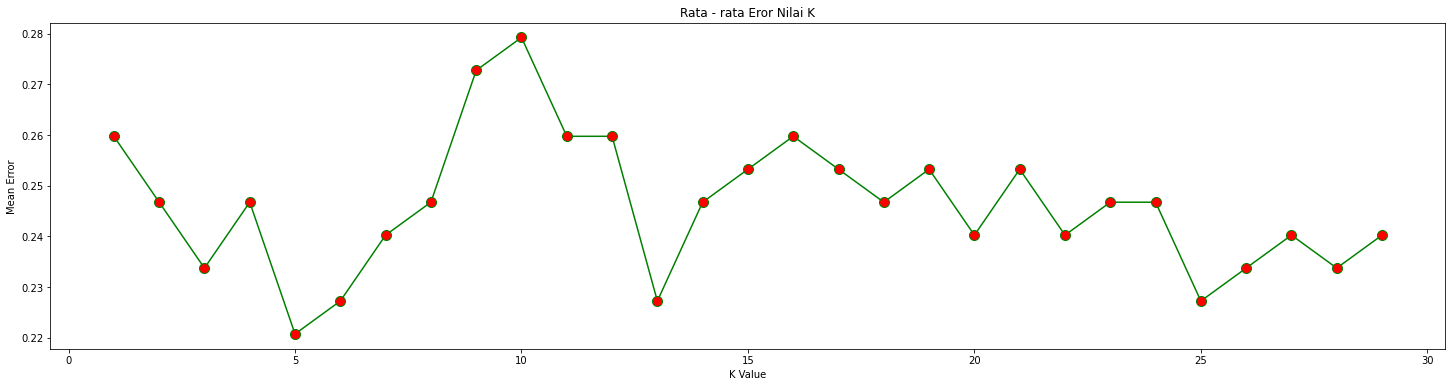

In [143]:
#Menampilkan Grafik Eror Nilai K

plt.figure(figsize=(25, 6))
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Rata - rata Eror Nilai K')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [144]:
#Menampilkan Akurasi 

score = []
for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    knnscore = knn.score(x_test, y_test)
    sken = score.append(knnscore)
    print(n, knnscore)

1 0.7402597402597403
2 0.7532467532467533
3 0.7662337662337663
4 0.7532467532467533
5 0.7792207792207793
6 0.7727272727272727
7 0.7597402597402597
8 0.7532467532467533
9 0.7272727272727273
10 0.7207792207792207
11 0.7402597402597403
12 0.7402597402597403
13 0.7727272727272727
14 0.7532467532467533
15 0.7467532467532467
16 0.7402597402597403
17 0.7467532467532467
18 0.7532467532467533
19 0.7467532467532467
20 0.7597402597402597
21 0.7467532467532467
22 0.7597402597402597
23 0.7532467532467533
24 0.7532467532467533
25 0.7727272727272727
26 0.7662337662337663
27 0.7597402597402597
28 0.7662337662337663
29 0.7597402597402597


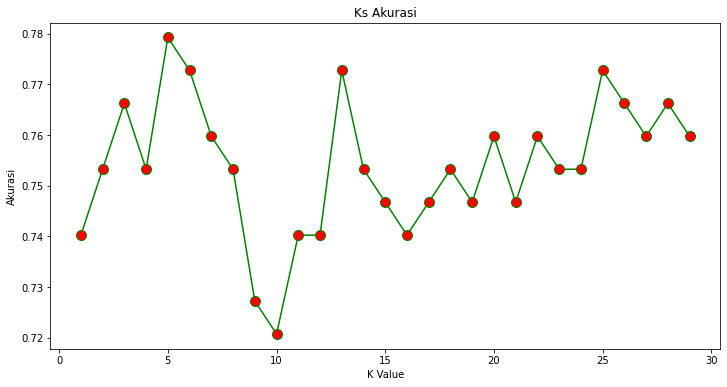

In [149]:
#Menampilkan Grafik  Akruasi tiap Nilai K

plt.figure(figsize=(12,6))
plt.plot(range(1,30), score, color='green', linestyle='-', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Ks Akurasi')
plt.xlabel('K Value')
plt.ylabel('Akurasi')
plt.show()

In [145]:
#Simpan model pakai PICKLE

with open('knn_pickle', 'wb') as r:
    pickle.dump(knn,r)

In [146]:
with open('knn_pickle', 'rb') as r:
    knnp = pickle.load(r)

In [148]:
y_pred = knnp.predict(x_test)

round(accuracy_score(y_test, y_pred),3)

0.76